# SOK-1006 V23

## Arbeidskrav 5 - Bedriftens inntekter og kostnader

### 2. Kostnader på kort sikt

Vi skal skrive kostnadsfunksjonen på kort sikt som en funksjon av hvor mange enheter bedriften produserer. På kort sikt er det minst én produksjonsfaktor som er fast.       

**Oppgave**      

En bedrift produserer goder med følgende produktfunksjon:


\begin{equation}
    x = f(N,K)=N^{0.5}K^{0.5}\tag{1}
\end{equation}

På kort sikt har bedriften tilgang til begrenset kapital $K_0=10$. Prisen per enhet kapital er fast $r=500$ NOK, mens én time med arbeidskraft koster $w=350$ NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).      

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N, K, x, w, r=sp.symbols('N K x w, r', real=True, positive=True)

In [3]:
# Definerer prodf(). 
def prodf(N, K):
    return (N**.5)*(K**.5)

prodf(N, K)

K**0.5*N**0.5

In [4]:
# Skriver verdier man vet fra før. 
r = 500
w = 350
k0 = 10
k1 = 50
fast = 10000

##### a) Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(x, K_0)$. Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til $K_1=50$. Kommenter dine funn.

In [5]:
def knad(N, K, r, w):
    return (K*r) + (N*w) + fast

display(knad(N, K, r, w))

# Kodesnutt hentet fra notat.forel.7. 
sol = sp.solve(prodf(N, K) - x, N) [0]

def Cs(x, K):
    return (K*500) + 10000 + ((350*x**2) / K)
Cs(x, K)

500*K + 350*N + 10000

500*K + 10000 + 350*x**2/K

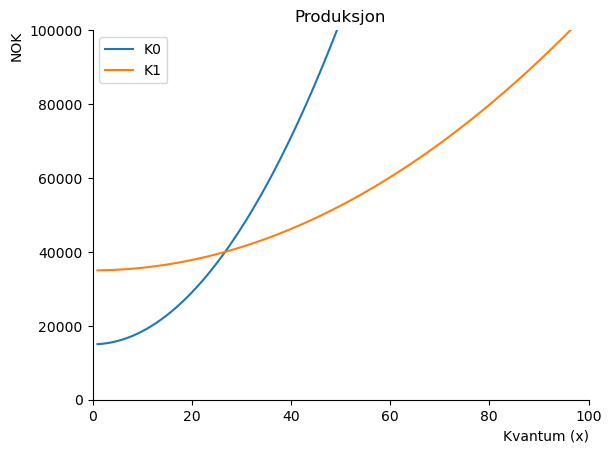

In [6]:
n=np.linspace(1,100,100)

fig1, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylim(0, 100000)
ax.set_xlim(0, 100)
                

# plott funksjonen

ax.plot(n, Cs(n, k0), label='K0')
ax.plot(n, Cs(n, k1), label='K1')


# tittel
ax.set_title('Produksjon')

#vis navnene:
ax.legend(loc='best',frameon=True);

##### b) I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.       

In [7]:
def tgk(x, K):
    return Cs(x, K) / x

def vgk(x, K):
    return (Cs(x, K) - fast) / x

def gk(x, K):
    return (Cs(x+1, K) - Cs(x, K)) / (x+1 - x)

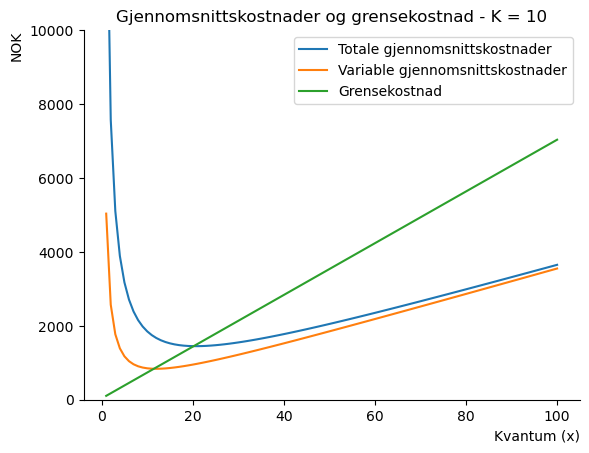

In [8]:
n=np.linspace(1,100,100)

fig2, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top')
ax.set_xlabel('Kvantum (x)', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_ylim(0, 10000)
                

# plott funksjonen

ax.plot(n, tgk(n, k0), label='Totale gjennomsnittskostnader')
ax.plot(n, vgk(n, k0), label='Variable gjennomsnittskostnader')
ax.plot(n, gk(n, k0), label='Grensekostnad')


# tittel
ax.set_title('Gjennomsnittskostnader og grensekostnad - K = 10')

#vis navnene:
ax.legend(loc='best',frameon=True);

##### c) Hvilke skalaegenskaper viser denne produktfunksjon?

**Oppgave**         
*Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? Undersøk din løsning ved å kjøre samme analyse som ovenfor med en generell Cobb-Douglas produktfunksjon $x=N^aK^b$, hvor $a,b>0$ er produksjonselastisitetene til arbeidskraft og kapital.*

In [9]:
N,K,X,a,b,lmda=sp.symbols('N K X a b \lambda', real=True, positive=True)

def x_f(N, K):
    return N**a * K**b

display(x_f(N, K))

L=a*N + b*K-lmda*(x_f(N, K)-X)

K**b*N**a

In [10]:
dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)
display (foc_N)
display (foc_K)

Eq(-K**b*N**a*\lambda*a/N + a, 0)

Eq(b - K**b*N**a*\lambda*b/K, 0)

In [12]:
display (dL_N.args)
display (dL_K.args)
# da kan vi skrive den rel prisen på arbeidskraft (a/b) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

(a, -K**b*N**a*\lambda*a/N)

(b, -K**b*N**a*\lambda*b/K)

In [13]:
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(a/b, K*a/(N*b))